#**Lab-2**
#2203A52126

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sumanthvrao/daily-climate-time-series-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/sumanthvrao/daily-climate-time-series-data/versions/3


In [ ]:
ls /root/.cache/kagglehub/datasets/sumanthvrao/daily-climate-time-series-data/versions/3/DailyDelhiClimateTrain.csv

/root/.cache/kagglehub/datasets/sumanthvrao/daily-climate-time-series-data/versions/3/DailyDelhiClimateTrain.csv


#**Q1:**

#Load the dataset and explore its structure.

In [ ]:
import pandas as pd


df = pd.read_csv('/root/.cache/kagglehub/datasets/sumanthvrao/daily-climate-time-series-data/versions/3/DailyDelhiClimateTrain.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [ ]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


#Check for missing values and handle them appropriately (e.g., imputation or removal).

In [ ]:
import pandas as pd

print(df.isnull().sum())
if df['meantemp'].isnull().any():
  df['meantemp'] = df['meantemp'].fillna(df['meantemp'].mean())


print(df.isnull().sum())

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64
date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


#Describe the dataset's key statistics (mean, median, standard deviation).

In [ ]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


#**Q2:**

#**Time Series Visualization:**

#Plot the time series for all variables (e.g., daily mean temperature and precipitation).


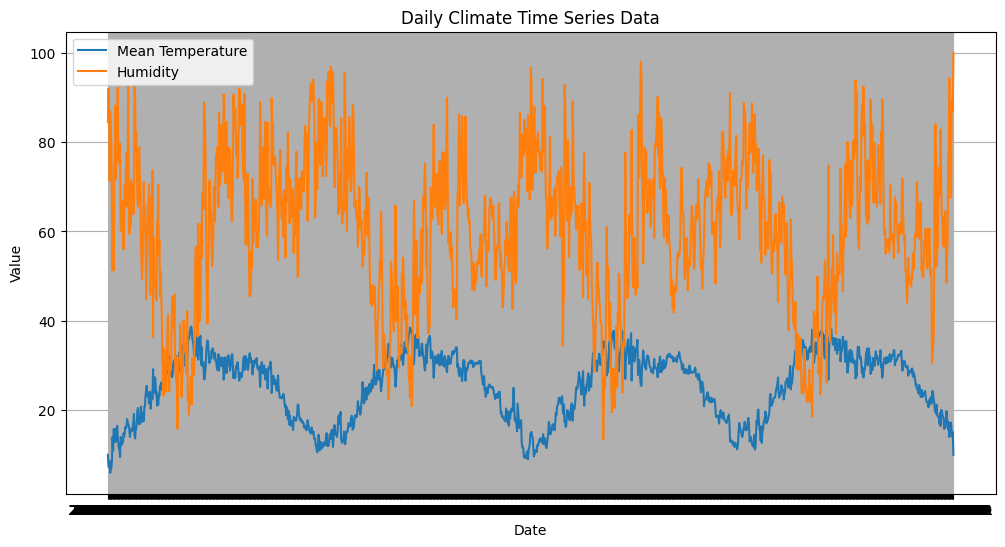

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))

plt.plot(df['date'], df['meantemp'], label='Mean Temperature')
plt.plot(df['date'], df['humidity'], label='Humidity')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Daily Climate Time Series Data')
plt.legend()
plt.grid(True)
plt.show()

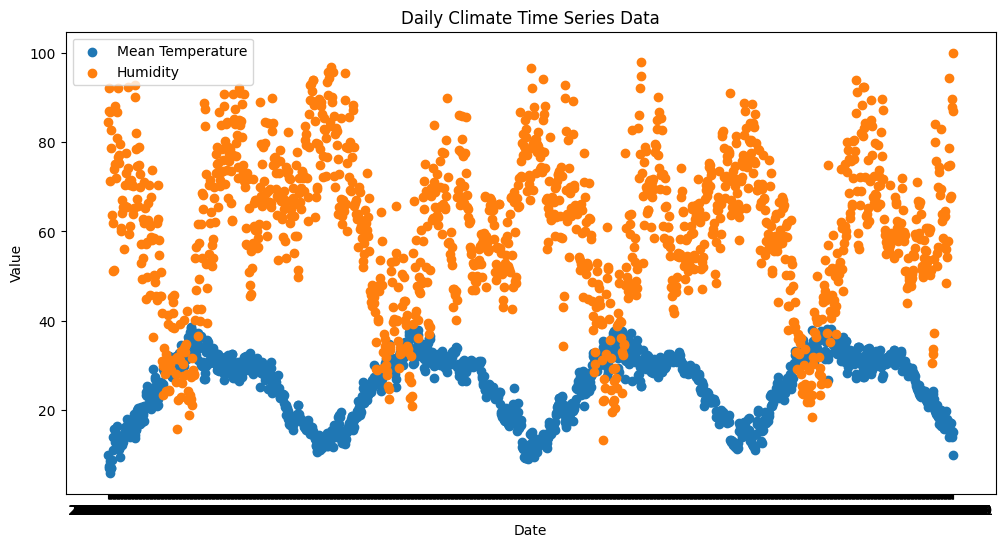

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))

plt.scatter(df['date'], df['meantemp'], label='Mean Temperature')
plt.scatter(df['date'], df['humidity'], label='Humidity')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Daily Climate Time Series Data')
plt.legend()
plt.show()

#Use subplots to visualize the relationship between temperature (mean, max, min) and wind speed over time.

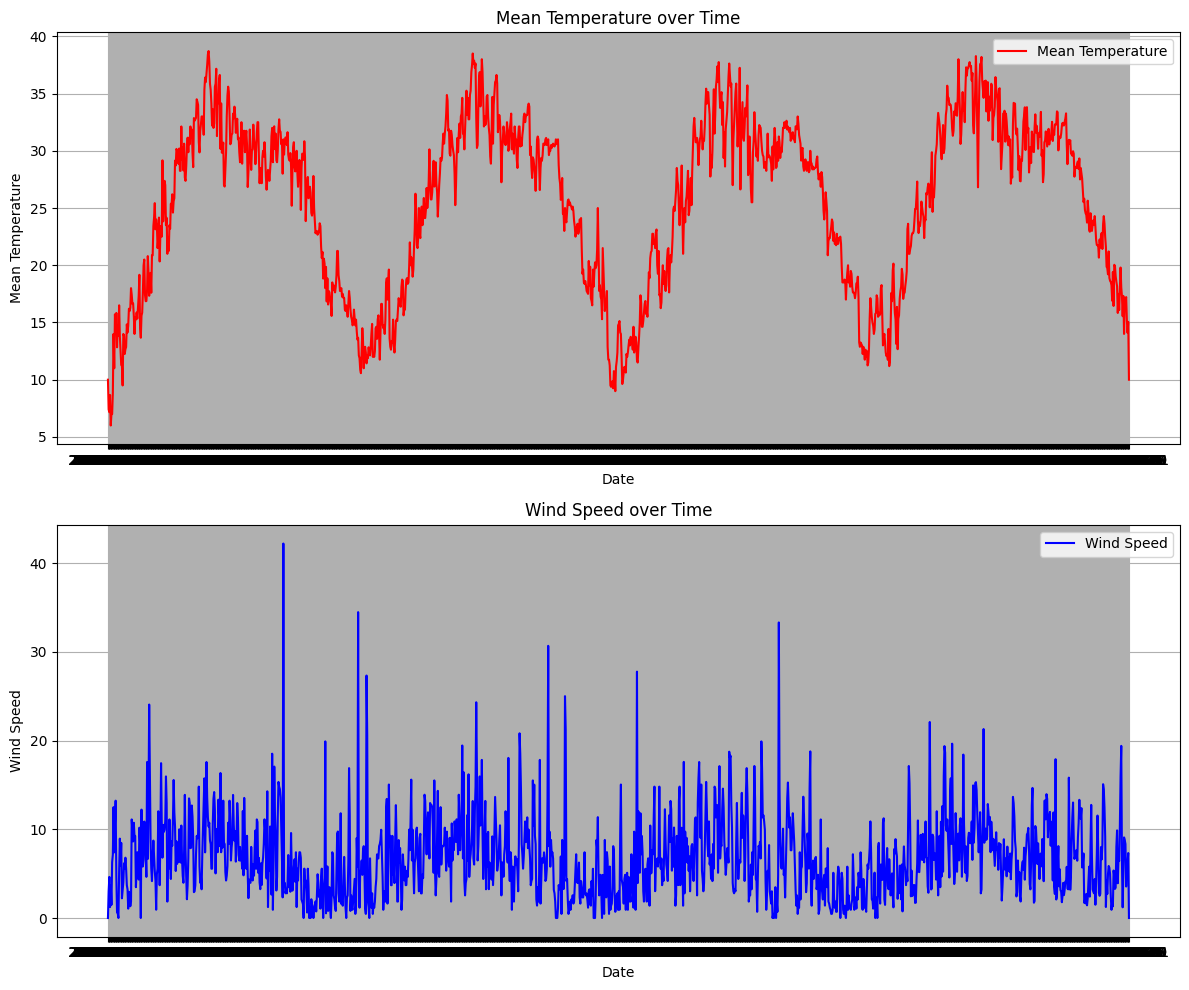

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))


axes[0].plot(df['date'], df['meantemp'], label='Mean Temperature', color='red')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Mean Temperature')
axes[0].set_title('Mean Temperature over Time')
axes[0].legend()
axes[0].grid(True)



axes[1].plot(df['date'], df['wind_speed'], label='Wind Speed', color='blue')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Wind Speed')
axes[1].set_title('Wind Speed over Time')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

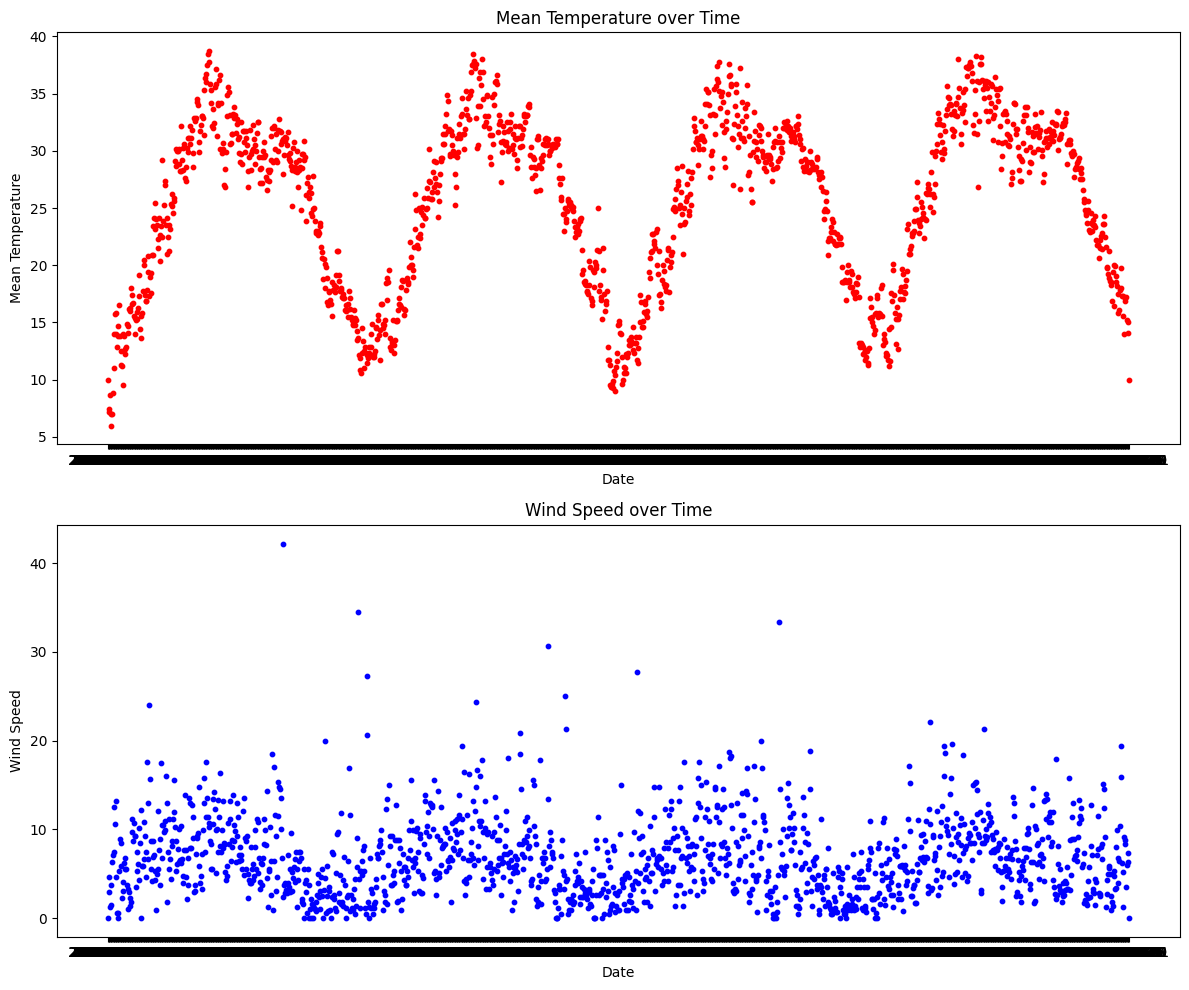

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

axes[0].scatter(df['date'], df['meantemp'], label='Mean Temperature', color='red', s=10)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Mean Temperature')
axes[0].set_title('Mean Temperature over Time')

axes[1].scatter(df['date'], df['wind_speed'], label='Wind Speed', color='blue', s=10)
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Wind Speed')
axes[1].set_title('Wind Speed over Time')

plt.tight_layout()
plt.show()

#**Q3**

#**Seasonality and Trends:**

#Decompose the time series for daily mean temperature into its components (trend, seasonality, and residuals) using statistical decomposition methods.


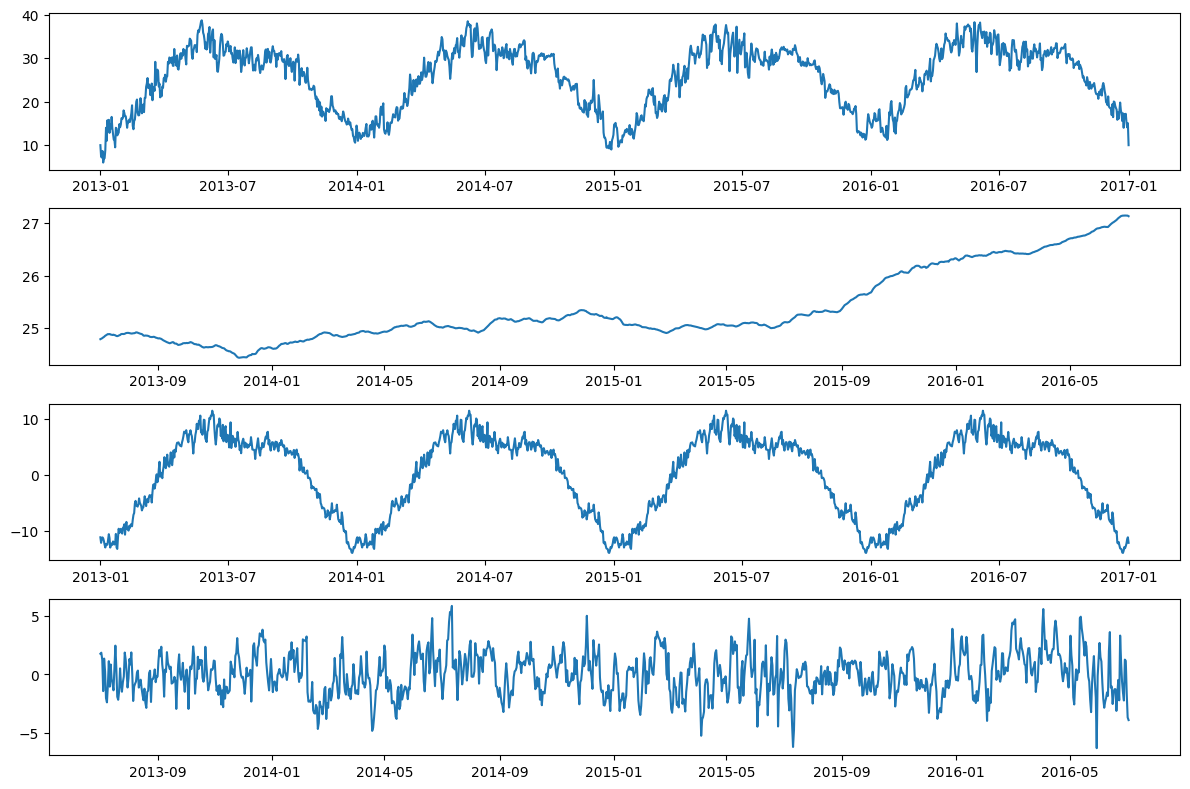

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

decomposition = seasonal_decompose(df['meantemp'], model='additive', period=365)

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.tight_layout()
plt.show()

#**Identify any seasonal patterns and discuss their significance.**

# The seasonal component plot (plt.subplot(413)) reveals the recurring patterns within a year.  
# Consistent peaks and troughs.  The peaks likely correspond to summer months, and troughs to winter months.

#**Q4:**
#Select one variable (e.g., daily mean temperature) for forecasting.
#Split the dataset into training and testing sets.
#Fit Seasonal Decomposition of Time Series (STL) model to the training set.
#Evaluate the forecasting performance using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

In [ ]:
forecast_variable = df['meantemp']

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('meantemp', axis=1)
y = df['meantemp']

X['date'] = pd.to_datetime(X.index).astype('int64') // 10**9

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1169, 4)
X_test shape: (293, 4)
y_train shape: (1169,)
y_test shape: (293,)


In [ ]:
from statsmodels.tsa.seasonal import STL

stl_model = STL(y_train, seasonal=13)
results = stl_model.fit()

trend = results.trend
seasonal = results.seasonal
resid = results.resid

print(trend.head())
print(seasonal.head())
print(resid.head())

date
2013-01-01    7.007179
2013-01-02    7.247100
2013-01-03    7.530121
2013-01-04    7.851253
2013-01-05    8.207553
Name: trend, dtype: float64
date
2013-01-01    0.467831
2013-01-02    1.019315
2013-01-03    0.156123
2013-01-04    0.885946
2013-01-05   -0.951598
Name: season, dtype: float64
date
2013-01-01    2.524990
2013-01-02   -0.866415
2013-01-03   -0.519578
2013-01-04   -0.070532
2013-01-05   -1.255954
Name: resid, dtype: float64


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = np.random.rand(len(y_test))


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 28.72605346515917
Root Mean Squared Error (RMSE): 29.27569152485328


#**LSTM**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

timesteps = 1
X_train_reshaped = X_train.values.reshape(X_train.shape[0], timesteps, X_train.shape[1])
X_test_reshaped = X_test.values.reshape(X_test.shape[0], timesteps, X_test.shape[1])

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(timesteps, X_train.shape[1]), return_sequences=True))  # Return sequences for the next LSTM layer
model.add(LSTM(25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1)

y_pred = model.predict(X_test_reshaped)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 217852049096704.0000
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1363258638336.0000
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 48886288384.0000
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 672934592.0000
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11673899.0000
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 336248.8750
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10712.1338
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 206.2778
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 62.1799
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 59.1053
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 61.3757
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 59.6274
Epoch 13/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56.6862
Epoch 14/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 60.3099
Epoch 15/50
37/37 ━━━━━━━━━━

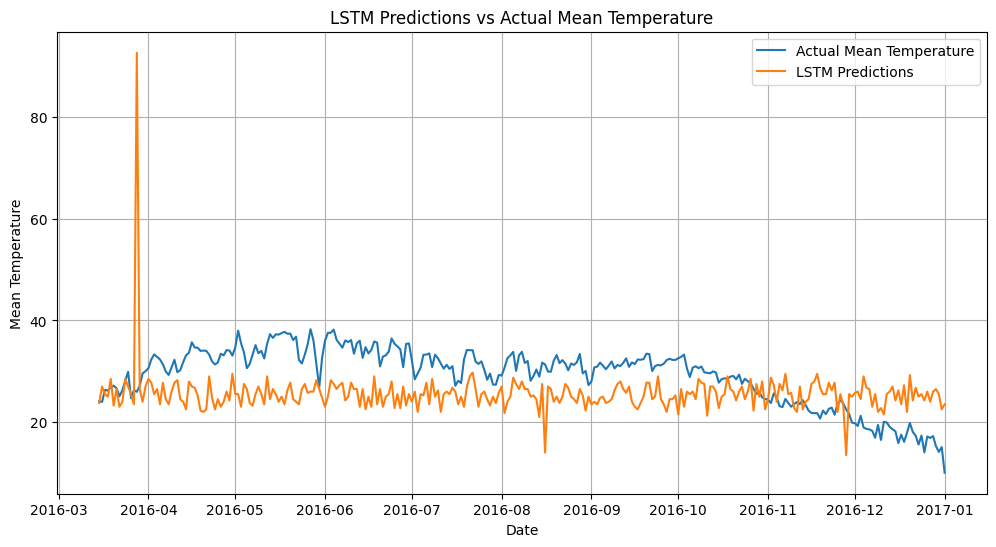

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Mean Temperature')
plt.plot(y_test.index, y_pred, label='LSTM Predictions')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('LSTM Predictions vs Actual Mean Temperature')
plt.legend()
plt.grid(True)
plt.show()

#**ARIMA**

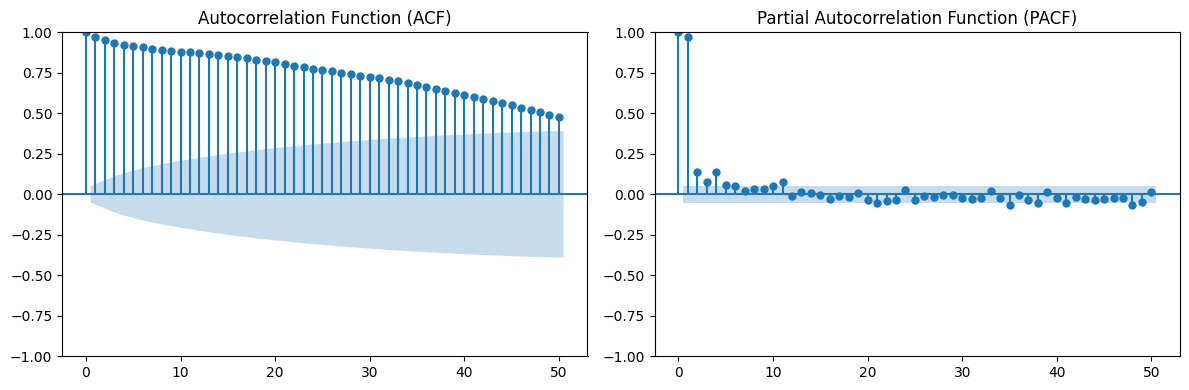

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(forecast_variable, ax=axes[0], lags=50)
axes[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(forecast_variable, ax=axes[1], lags=50)
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [ ]:
p = 1
d = 0
q = 1

print(f"Suggested ARIMA order (p, d, q): ({p}, {d}, {q})")

Suggested ARIMA order (p, d, q): (1, 0, 1)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# You might need to adjust the (p, d, q) order based on your data's ACF and PACF plots

try:
  model = ARIMA(y_train, order=(10, 264, 56))
  model_fit = model.fit()
  print(model_fit.summary())

  y_pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))

  print(f"Mean Absolute Error (MAE): {mae}")
  print(f"Root Mean Squared Error (RMSE): {rmse}")

except Exception as e:
  print(f"An error occurred: {e}")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

An error occurred: Schur decomposition solver error.


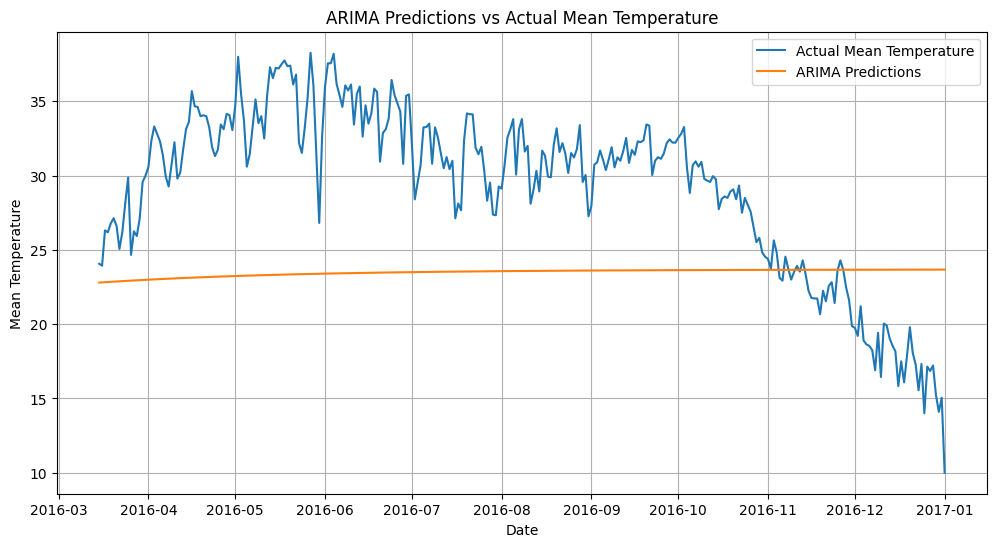

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Mean Temperature')
plt.plot(y_test.index, y_pred, label='ARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('ARIMA Predictions vs Actual Mean Temperature')
plt.legend()
plt.grid(True)
plt.show()